In [11]:
import math ; pi=math.pi
import numpy as np
import matplotlib.pyplot as plt
import itertools
#%matplotlib widget
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
import time
import json
import imp
import os
np.warnings.filterwarnings('ignore')
import PySSC
import PySSC_AP
from classy import Class

# Dirac Window, Angpow case

In [4]:
imp.reload(PySSC_AP)
imp.reload(PySSC)

kk  = (2*np.pi/(1000))*np.arange(1,1001)
Pk = np.ones(len(kk))
Omega_b     = 0.05
Omega_cdm   = 0.27
Omega_m     = Omega_b + Omega_cdm
path        = './AngPow_files/' #loc of all AngPow stuffs
name        = 'SSC' #the name of the new AngPow .ini file
np.savetxt('%s%s_Pk.txt'%(path,name),np.transpose(np.vstack((kk,Pk)))) #AngPow needs Pk(z=0)
cl_kmax     = np.amax(kk) #cl_kmax is the maximum k of the integral made by Ang

ini = {'Lmin' : 0,'Lmax' : 1 ,'linearStep' : 40, 'logStep' : 1.15,'algo_type' : 1,'limber_lthr1' : -1,'limber_lthr2' : -1,'wtype':'Dirac','mean' : 1,'width': -1,'cross_depth' : 0,'n_sigma_cut' : '5','cl_kmax' : cl_kmax,'radial_quad'  : 'trapezes','radial_order' : 50,'chebyshev_order' : 9,'n_bessel_roots_per_interval' : 100,'h': 0.67,'omega_matter': Omega_m ,'omega_baryon': Omega_b,'hasX' : 0,'omega_X' :'','wX':'','waX':'','cosmo_zmin' : 0.,'cosmo_zmax' : 10.,'cosmo_npts' : 1000,'cosmo_precision' : 0.001,'Lmax_for_xmin' : 2000,'jl_xmin_cut'   : 5e-10,'output_dir' : path,'common_file_tag' : 'angpow_bench_%s_'%name,'quadrature_rule_ios_dir' : '%sAngPow/data/'%(path),'power_spectrum_input_dir': path,'power_spectrum_input_file' : '%s_Pk.txt' %name,'pw_kmin' : np.amin(kk),'pw_kmax' : np.amax(kk),}

# write all AngPow parameters in a .ini file
out = '%sangpow_bench_%s.ini'%(path,name)
fo  = open(out, "w")
for k, v in ini.items():
     fo.write(str(k) + '='+ str(v) + '\n')
fo.close()
os.system('%sAngPow/bin/angpow %sangpow_bench_%s.ini'%(path,path,name))
l_angpow,cl_angpow = np.loadtxt('%sangpow_bench_%s_cl.txt'%(path,name),ndmin=2,unpack=True)

os.remove('%sangpow_bench_%s_cl.txt'%(path,name))
os.remove('%sangpow_bench_%s_ctheta.txt'%(path,name))
os.remove('%sangpow_bench_%s_used-param.txt'%(path,name))
os.remove('%sangpow_bench_%s.ini'%(path,name))

print(l_angpow,cl_angpow)

[0.] [2.09802746e-07]


# Gaussian Window, Angpow case

In [5]:
ini = {'Lmin' : 0,'Lmax' : 1 ,'linearStep' : 40, 'logStep' : 1.15,'algo_type' : 1,'limber_lthr1' : -1,'limber_lthr2' : -1,'wtype':'Gauss','mean' : 1,'width': 0.1,'cross_depth' : 0,'n_sigma_cut' : '5','cl_kmax' : cl_kmax,'radial_quad'  : 'trapezes','radial_order' : 50,'chebyshev_order' : 9,'n_bessel_roots_per_interval' : 100,'h': 0.67,'omega_matter': Omega_m ,'omega_baryon': Omega_b,'hasX' : 0,'omega_X' :'','wX':'','waX':'','cosmo_zmin' : 0.,'cosmo_zmax' : 10.,'cosmo_npts' : 1000,'cosmo_precision' : 0.001,'Lmax_for_xmin' : 2000,'jl_xmin_cut'   : 5e-10,'output_dir' : path,'common_file_tag' : 'angpow_bench_%s_'%name,'quadrature_rule_ios_dir' : '%sAngPow/data/'%(path),'power_spectrum_input_dir': path,'power_spectrum_input_file' : '%s_Pk.txt' %name,'pw_kmin' : np.amin(kk),'pw_kmax' : np.amax(kk),}

# write all AngPow parameters in a .ini file
out = '%sangpow_bench_%s.ini'%(path,name)
fo  = open(out, "w")
for k, v in ini.items():
     fo.write(str(k) + '='+ str(v) + '\n')
fo.close()
os.system('%sAngPow/bin/angpow %sangpow_bench_%s.ini'%(path,path,name))
l_angpow,cl_angpow = np.loadtxt('%sangpow_bench_%s_cl.txt'%(path,name),ndmin=2,unpack=True)

os.remove('%sangpow_bench_%s_cl.txt'%(path,name))
os.remove('%sangpow_bench_%s_ctheta.txt'%(path,name))
os.remove('%sangpow_bench_%s_used-param.txt'%(path,name))
os.remove('%sangpow_bench_%s.ini'%(path,name))

print(l_angpow,cl_angpow)

[0.] [6.15104135e-09]


# Gaussian Window, PySSC case
need to modify PySSC with :

kk = (2*np.pi/(1000))*np.arange(1,1001)

Pk = np.ones(len(kk))

kk*=h

Pk/=(h**3)

nk = len(kk)


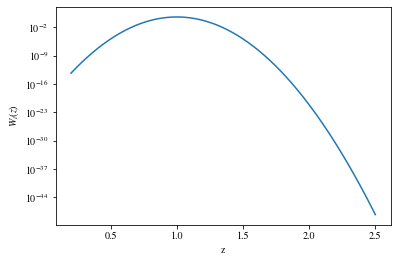

In [2]:
sigmaz    = 0.1
zcenter_G = [1]
nbins_G   = len(zcenter_G)
nz        = 400
windows_G = np.zeros((nbins_G,nz))
zmin = 0.2 ; zmax = 2.5
z_arr     = np.linspace(zmin,zmax,nz)
for i in range(nbins_G):
    windows_G[i,:] = np.exp(-(z_arr-zcenter_G[i])**2/(2*sigmaz**2)) / np.sqrt(2*pi*sigmaz**2)

# Plot window functions
fig,ax=plt.subplots(1,1)
for i in range(nbins_G):
    ax.semilogy(z_arr,windows_G[i,:])
ax.set_xlabel('z') ; ax.set_ylabel('$W_i(z)$')
fig.show()

In [3]:
imp.reload(PySSC)
print(PySSC.Sij(z_arr,windows_G))

[[2.55110068e-10]]


In [14]:
# Define function which is PySSC's Sij but with P(k)= 1 (Mpc/h)^3
default_cosmo_params = {'omega_b':0.022,'omega_cdm':0.12,'H0':67.,'n_s':0.96,'sigma8':0.81}
import math ; pi=math.pi
import numpy as np
import sys
import scipy.integrate as integrate
from scipy.interpolate import interp1d
from classy import Class
def Sij_Pkone(z_arr, windows, cosmo_params=default_cosmo_params,precision=10,cosmo_Class=None):

    # Assert everything as the good type and shape, and find number of redshifts, bins etc
    zz  = np.asarray(z_arr)
    win = np.asarray(windows)
    
    assert zz.ndim==1, 'z_arr must be a 1-dimensional array'
    assert win.ndim==2, 'windows must be a 2-dimensional array'
    
    nz    = len(zz)
    nbins = win.shape[0]
    assert win.shape[1]==nz, 'windows must have shape (nbins,nz)'
    
    assert zz.min()>0, 'z_arr must have values > 0'
    
    # If the cosmology is not provided (in the same form as CLASS), run CLASS
    if cosmo_Class is None:
        cosmo = Class()
        dico_for_CLASS = cosmo_params
        dico_for_CLASS['output'] = 'mPk'
        cosmo.set(dico_for_CLASS)
        cosmo.compute()
    else:
        cosmo = cosmo_Class

    h = cosmo.h() #for  conversions Mpc/h <-> Mpc
    
    # Define arrays of r(z), k, P(k)...
    zofr        = cosmo.z_of_r(zz)
    comov_dist  = zofr[0]                                   #Comoving distance r(z) in Mpc
    dcomov_dist = 1/zofr[1]                                 #Derivative dr/dz in Mpc
    dV          = comov_dist**2 * dcomov_dist               #Comoving volume per solid angle in Mpc^3/sr
    growth      = np.zeros(nz)                              #Growth factor
    for iz in range(nz):
        growth[iz] = cosmo.scale_independent_growth_factor(zz[iz])
    
    # Compute normalisations
    Inorm       = np.zeros(nbins)
    for i1 in range(nbins):
        integrand = dV * windows[i1,:]**2
        Inorm[i1] = integrate.simps(integrand,zz)
    
    # Compute U(i,k), numerator of Sij (integral of Window**2 * matter )
    #Previous definition of k,P(k) arrays 
    #keq         = 0.02/h                                          #Equality matter radiation in 1/Mpc (more or less)
    #klogwidth   = 10                                              #Factor of width of the integration range. 10 seems ok
    #kmin        = min(keq,1./comov_dist.max())/klogwidth
    #kmax        = max(keq,1./comov_dist.min())*klogwidth
    #nk          = 2**precision                                    #10 seems to be enough. Increase to test precision, reduce to speed up.
    ##kk          = np.linspace(kmin,kmax,num=nk)                   #linear grid on k
    #logkmin     = np.log(kmin) ; logkmax   = np.log(kmax)
    #logk        = np.linspace(logkmin,logkmax,num=nk)
    #kk          = np.exp(logk)                                     #logarithmic grid on k
    #Pk          = np.zeros(nk)
    #for ik in range(nk):
    #    Pk[ik] = cosmo.pk(kk[ik],0.)                              #In Mpc^3
    #Tweak to have P(k)= 1 (Mpc/h)^3
    kk = (2*np.pi/(1000))*np.arange(1,1001)
    Pk = np.ones(len(kk))
    kk*=h
    Pk/=(h**3)
    nk = len(kk)
    Uarr        = np.zeros((nbins,nk))
    for ibin in range(nbins):
        for ik in range(nk):
            kr            = kk[ik]*comov_dist
            integrand     = dV * windows[ibin,:]**2 * growth * np.sin(kr)/kr
            Uarr[ibin,ik] = integrate.simps(integrand,zz)
    
    # Compute Sij finally
    Cl_zero     = np.zeros((nbins,nbins))
    #For i<=j
    for ibin in range(nbins):
        U1 = Uarr[ibin,:]/Inorm[ibin]
        for jbin in range(ibin,nbins):
            U2 = Uarr[jbin,:]/Inorm[jbin]
            integrand = kk**2 * Pk * U1 * U2
            Cl_zero[ibin,jbin] = 2/pi * integrate.simps(integrand,kk)     #linear integration
            #Cl_zero[ibin,jbin] = 2/pi * integrate.simps(integrand*kk,logk) #log integration
    #Fill by symmetry   
    for ibin in range(nbins):
        for jbin in range(nbins):
            Cl_zero[ibin,jbin] = Cl_zero[min(ibin,jbin),max(ibin,jbin)]
    Sij_Pkone = Cl_zero / (4*pi)
    
    return Sij_Pkone

In [15]:
print(Sij_Pkone(z_arr,windows_G))

[[2.48983437e-10]]
